# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.experimental import enable_halving_search_cv

In [3]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay , f1_score ,classification_report
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV, HalvingGridSearchCV

# Read The Training DataSet

In [4]:
df=pd.read_csv('train1.csv')

In [5]:
features=df.columns[:-1]
target=df.columns[-1]
X=df[features]
y=df[target]

## Test Train Split 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, 
    test_size=0.20,
    random_state=42,
    shuffle=True
)

# Declear Pipeline 

In [7]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

In [8]:
categorical_transformer = Pipeline(
    steps=[(
    "encoder",OneHotEncoder()
    )]
)

In [9]:
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

In [10]:
preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", numeric_transformer, numerical_columns),
        ("categorical", categorical_transformer, categorical_columns),
    ]
)

In [11]:
pipe=Pipeline(steps=[
    ('preprocess',preprocessor),
    ('model',LogisticRegression(max_iter=10000,n_jobs=-1))
])

## Target Transformation

In [12]:
lb=LabelEncoder()
lb.fit(y_train)
y_train=lb.transform(y_train)

# Fit Data into pipeline

In [13]:
pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['offer_expiration(hrs)',
                                                   'income_range', 'age',
                                                   'western/chinese',
                                                   'restuarant_same_direction_house',
                                                   'cooks_regularly',
                                                   'is_foodie', 'children',
                                                   'visit_restaurant_with_rating_(avg)',
                                                   'temperature', 'travel_time',
                                                   'prefer_home_food']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['shaadi', 'restaurant_type',
                                                   'gender', 'customer_type',
                                                   'education', 'industry',
                                                   'climate',
                                                   'drop_location'])])),
                ('model', LogisticRegression(max_iter=10000, n_jobs=-1))])

In [14]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['offer_expiration(hrs)',
                                                   'income_range', 'age',
                                                   'western/chinese',
                                                   'restuarant_same_direction_house',
                                                   'cooks_regularly',
                                                   'is_foodie', 'children',
                                                   'visit_restaurant_with_rating_(avg)',
                                                   'temperature', 'travel_time',
                                                   'prefer_home_food']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['shaadi', 'restaurant_type',
                                                   'gender', 'customer_type',
                                                   'education', 'industry',
                                                   'climate',
                                                   'drop_location'])])),
                ('model', LogisticRegression(max_iter=10000, n_jobs=-1))])

In [15]:
pipe.score(X_train,y_train)

0.6063819044733919

In [16]:
y_test=lb.transform(y_test)

In [17]:
pipe.score(X_test,y_test)

0.595718901453958

In [18]:
y_pred=pipe.predict(X_test)

In [19]:
y_pred=lb.inverse_transform(y_pred)

In [20]:
y_pred

array(['Yes', 'Yes', 'No', ..., 'Yes', 'Yes', 'No'], dtype=object)

In [21]:
ans=pd.read_csv('test1.csv')
out=pipe.predict(ans)
out=lb.inverse_transform(out)
out

array(['Yes', 'Yes', 'Yes', ..., 'No', 'No', 'Yes'], dtype=object)

In [22]:
submission=pd.DataFrame(columns=['id','Offer Accepted'])
submission['id']=[i for i in range(len(ans))]
submission['Offer Accepted']=out

<AxesSubplot: xlabel='Offer Accepted', ylabel='count'>

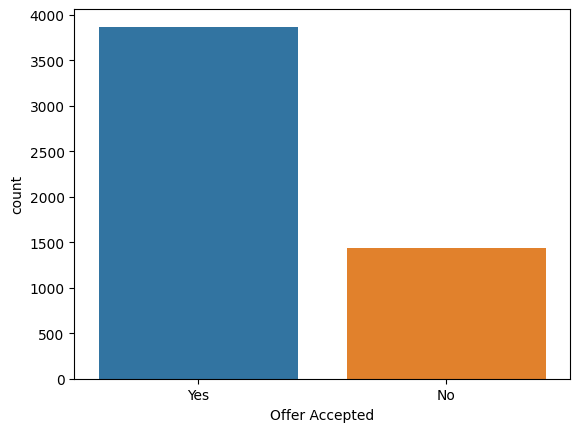

In [23]:
sns.countplot(x=submission['Offer Accepted'])

In [24]:
submission.to_csv('submission.csv',index=False)

,id,Offer Accepted
0,0,Yes
1,1,Yes
2,2,Yes
3,3,No
4,4,Yes
...,...,...
5300,5300,Yes
5301,5301,Yes
5302,5302,No
5303,5303,No


In [25]:
# grid_params = {
#     'model__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#     'model__C': [0.001,0.01,0.1,1,10,100],
#     'model__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# }

In [26]:
# clf = HalvingGridSearchCV(estimator=pipe, param_grid=grid_params, cv=10, verbose=10 ,n_jobs=-1)
# clf.fit(X_train, y_train)

In [27]:
# clf.best_estimator_

In [28]:
# clf.score(X_train,y_train)

In [29]:
# clf.score(X_test,y_test)